In [1]:
# from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

# from scipy.signal import find_peaks
# from scipy.optimize import curve_fit
# from scipy.interpolate import make_interp_spline  # for smooth envelope interpolation

plt.style.use('seaborn-v0_8')
plt.rcParams['legend.framealpha'] = 1  ## disable any default legend frame transparency from the style

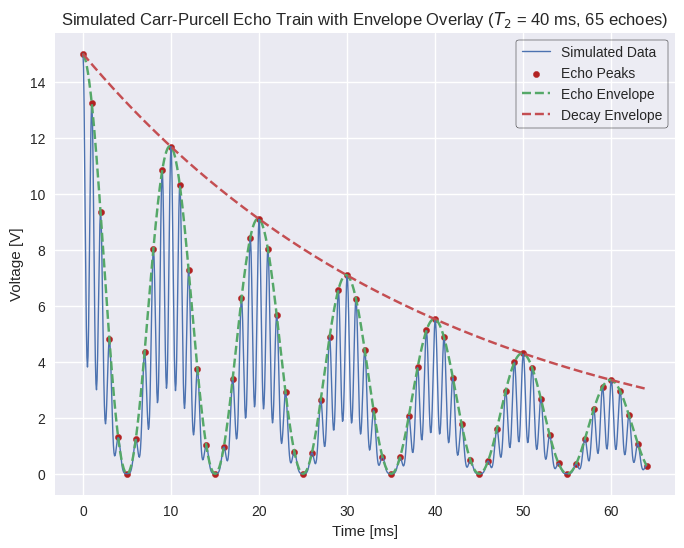

In [30]:
# ---------------------------------- inputs ---------------------------------- #

# num pi pulses after the initial π/2 pulse
num_echoes = 65

# time between echoes [seconds]
echo_spacing = 1e-3

# transverse relaxation time [seconds]
T2 = 40e-3

# initial amplitude [volts]
A0 = 15.0

# beat period in echoes (one modulation cycle every N echoes)
beat_period = 10

# width (std dev) of each Gaussian echo
sigma = echo_spacing / 4



# ----------------- define echo times and discrete amplitudes ---------------- #
idx_echoes = np.arange(0, num_echoes)
t_echo = idx_echoes * echo_spacing  # echo times

## calc amplitude for each echo
# amplitude = A0 * exp(-t_echo/T2) * [0.5*(1 + cos(2π * echo_index/beat_period))]
amplitudes = A0 * np.exp(-t_echo / T2) * (0.5 * (1 + np.cos(2 * np.pi * idx_echoes / beat_period)))



# --------------------------- simulated raw voltage -------------------------- #
t = np.linspace(0, t_echo[-1], 1000)
voltage = np.zeros_like(t)

## sum the contribution of each echo modeled as a Gaussian pulse
for i in range(num_echoes):
    voltage += amplitudes[i] * np.exp(-((t - t_echo[i])**2) / (2 * sigma**2))



# ------------------------------ smooth envelopes ---------------------------- #
envelope_deg1 = A0 * np.exp(-t/T2) * (0.5 * (1 + np.cos(2*np.pi*(t/echo_spacing)/beat_period)))
envelope_deg2 = A0 * np.exp(-t/T2)
# spline = make_interp_spline(t, amplitudes, k=3) # cubic spline interpolation (cheating lol)



# ----------------------------------- Plot ----------------------------------- #
fig, ax = plt.subplots(figsize=(8, 6))

t_ms = t * 1e3
t_echo_ms = t_echo * 1e3

ax.plot(
    t_ms,
    voltage,
    label='Simulated Data',
    linewidth=1,
)

ax.scatter(
    t_echo_ms,
    amplitudes,
    c='firebrick',
    s=20,
    label='Echo Peaks',
    # alpha=0.8
)

ax.plot(
    t_ms,
    envelope_deg1,
    linestyle='dashed',
    label='Echo Envelope',
)

ax.plot(
    t_ms,
    envelope_deg2,
    linestyle='dashed',
    label='Decay Envelope',
)


ax.set_xlabel('Time [ms]')
ax.set_ylabel('Voltage [V]')
ax.set_title(
    f'Simulated Carr-Purcell Echo Train with Envelope Overlay ($T_2$ = {T2*1e3:.0f} ms, {num_echoes} echoes)',
)

legend = ax.legend(
    frameon=True,
)
frame = legend.get_frame()
frame.set_alpha(None)  ## disable any rcParam alpha override
frame.set_facecolor((1, 1, 1, 0.1))  ## set frame coloring to white with some transparency
frame.set_edgecolor('black')

(figure text:)

Simulation of the beating behavior in a Carr-Purcell sequence with 60 $\pi$ pulses. Each echo is modeled as a Gaussian pulse. The echo amplitude decays exponentially (simulating $T_2$ decay) and is modulated by a cosine factor (to incorporate beating effects). Additionally, we overlay a smooth envelope curve that passes through the echo peak amplitudes.

---

(analytical envelope function:)

Our discrete echo peak amplitudes are given by

$$
A(n) = A_0 \exp{\left( -t_n/T_2 \right)} \cdot \left[ \tfrac{1}{2} (1 + \cos \left( 2\pi n / \text{beat\_period} \right) \right]
$$

with $t_n = n \times \text{echo\_spacing}$. We define a continuous version by replacing the discrete index $n$ with $t/\text{echo\_spacing}$.